<a href="https://colab.research.google.com/github/tjdrms0930/bit/blob/main/%EC%88%98%EC%A7%91_%EB%B6%84%EC%84%9D_%EC%8B%9C%EA%B0%81%ED%99%94_ML%EB%A1%9C_%EA%B0%80%EB%8A%94_%EA%B8%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 경사하강법을 이용한 선형 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
xs = [[2],[4],[9],[5],[3],[6]] # 특성이 하나로 구성된 독립변수 목록
ys = [8,12,31,15,12,20] # 종속변수 목록

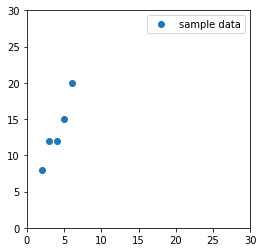

In [3]:
plt.figure(figsize=(4,4))
plt.plot(xs[:],ys,'o',label="sample data")
plt.xlim(0,30)
plt.ylim(0,30) 
plt.legend()
plt.show()

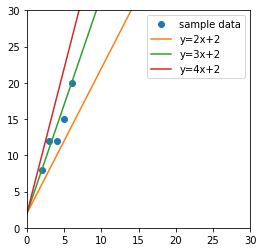

In [4]:
plt.figure(figsize=(4,4))
plt.plot(xs[:],ys,'o',label="sample data")
plt.plot([0,20],[2,42],label='y=2x+2')
plt.plot([0,20],[2,62],label='y=3x+2')
plt.plot([0,20],[2,82],label='y=4x+2')
plt.xlim(0,30)
plt.ylim(0,30)
plt.legend()
plt.show()

* 손실함수

실제 값과 예측 값의 차이를 손실(오차)라고 한다.


손실함수는 손실을 계산하는 함수로 평균(절대값(예측값 - 실제값)) 방식과 

평균((예측값-실제값)*(예측값-실제값)) 방식을 가장 선호한다.




In [5]:
def mse(yp,y): #mean squared error
  return np.mean((yp-y)**2)

In [6]:
nys = np.array(ys)
nysp1 = np.array([ 2*x[0]+2 for x in xs[:]])
nysp2 = np.array([ 3*x[0]+2 for x in xs[:]])
nysp3 = np.array([ 4*x[0]+2 for x in xs[:]])
print(mse(nysp1,nys))
print(mse(nysp2,nys))
print(mse(nysp3,nys))

31.666666666666668
2.1666666666666665
29.666666666666668


* 가중치를 바꿔가면서 mse 계산해 보기



In [7]:
ws = [w10/10 for w10 in range(-30,80)]
b = 2 #편향은 2로 가정하자.
x1 = [x[0] for x in xs]
mses = []
for w in ws:
  yp = np.array([w*x+b for x in x1])
  mses.append(mse(yp,nys))
print(mses)

[1034.1666666666667, 1000.1516666666665, 966.7066666666668, 933.8316666666666, 901.5266666666668, 869.7916666666666, 838.6266666666666, 808.0316666666668, 778.0066666666667, 748.5516666666668, 719.6666666666666, 691.3516666666666, 663.6066666666667, 636.4316666666665, 609.8266666666667, 583.7916666666666, 558.3266666666667, 533.4316666666667, 509.1066666666666, 485.35166666666663, 462.1666666666667, 439.5516666666667, 417.5066666666667, 396.0316666666666, 375.1266666666667, 354.7916666666667, 335.02666666666664, 315.83166666666665, 297.2066666666667, 279.15166666666664, 261.6666666666667, 244.75166666666667, 228.40666666666664, 212.63166666666666, 197.42666666666665, 182.79166666666666, 168.72666666666666, 155.23166666666665, 142.30666666666667, 129.95166666666665, 118.16666666666667, 106.95166666666667, 96.30666666666669, 86.23166666666664, 76.72666666666667, 67.79166666666667, 59.426666666666655, 51.63166666666669, 44.406666666666666, 37.75166666666667, 31.666666666666668, 26.1516666

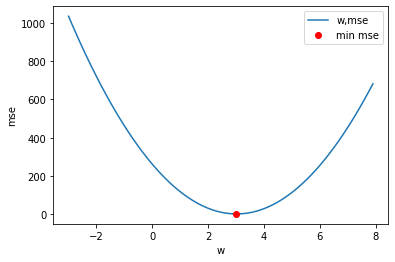

In [8]:
n_mses = np.array(mses)
mi = np.argmin(n_mses)
plt.plot(ws,mses,label='w,mse')
plt.plot(ws[mi], mses[mi],'ro',label='min mse')
plt.legend()
plt.xlabel('w')
plt.ylabel('mse')
plt.show()

In [9]:
bs = [b10/10 for b10 in range(-30,80)]
w = 3 #가중치 3으로 가정
x1 = [x[0] for x in xs]
mses = []
for b in bs:
  yp = np.array([w*x+b for x in x1])
  mses.append(mse(yp,nys))
print(mses)

[25.5, 24.543333333333333, 23.60666666666667, 22.689999999999998, 21.793333333333333, 20.916666666666668, 20.06, 19.22333333333334, 18.406666666666666, 17.610000000000003, 16.833333333333332, 16.076666666666664, 15.340000000000003, 14.623333333333333, 13.92666666666667, 13.25, 12.593333333333332, 11.956666666666669, 11.339999999999998, 10.743333333333338, 10.166666666666666, 9.609999999999998, 9.073333333333336, 8.556666666666663, 8.060000000000002, 7.583333333333333, 7.126666666666664, 6.690000000000002, 6.273333333333331, 5.876666666666669, 5.5, 5.143333333333332, 4.8066666666666675, 4.4899999999999975, 4.193333333333336, 3.9166666666666665, 3.6599999999999984, 3.4233333333333342, 3.206666666666665, 3.010000000000002, 2.8333333333333335, 2.6766666666666654, 2.5400000000000005, 2.4233333333333325, 2.3266666666666675, 2.25, 2.193333333333333, 2.1566666666666667, 2.1399999999999997, 2.1433333333333335, 2.1666666666666665, 2.2099999999999995, 2.273333333333333, 2.3566666666666674, 2.4599

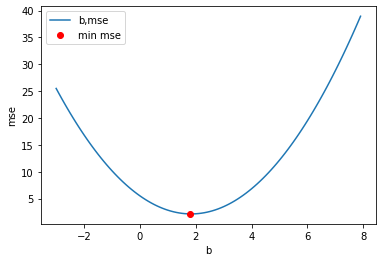

In [10]:
n_mses = np.array(mses)
mi = np.argmin(n_mses)
plt.plot(bs,mses,label='b,mse')
plt.plot(bs[mi], mses[mi],'ro',label='min mse')
plt.legend()
plt.xlabel('b')
plt.ylabel('mse')
plt.show()

* dmse/dw와 dmse/db

In [11]:
def gradient(xs,ys,w,b): #가중치 w일 때 dmse/dw와 편향 b일 때 dmse/db(bd)를 구하는 함수
  yp = w*xs+b #예측값
  error = ys-yp #에러값
  wd = -2/len(xs)*sum(error*xs)
  bd = -2/len(xs)*sum(error)
  return wd,bd

In [12]:
xs2 = np.array(xs).reshape(-1)
print(gradient(xs2,nys,2,2))
print(gradient(xs2,nys,3,2))
print(gradient(xs2,nys,4,2))

(-58.0, -9.333333333333332)
(-1.0, 0.3333333333333333)
(56.0, 10.0)


In [13]:
print(gradient(xs2,nys,3.08,1.8))

(1.6266666666666687, 0.7066666666666672)


In [14]:
print(gradient(xs2,nys,3.0527,1.8))

(0.07056666666668931, 0.44276666666667036)


* 경사하강법을 이용해서 기울기가 0에 가까운 w와 b를 찾기

In [15]:
#(경사*lr)만큼 이동하면서 기울기가 0인 지점을 찾는 함수
def gradient_descent(xs,ys,lr=0.001):
  wbhl = [] #학습 히스토리를 기억하기 위한 빈 목록 생성
  wp = np.random.uniform(-1,1) #초기 w를 -1에서 1사이의 랜덤값으로 지정
  bp = np.random.uniform(-1,1) #초기 b를 -1에서 1사이의 랜덤값으로 지정
  wbhl.append([wp,bp])

  for i in range(1000):
    wd,bd = gradient(xs,ys,wp,bp) #경사를 구함
    wp = wp-(wd*lr) #가중치를 기울기*학습률만큼 빼 줌
    bp = bp-(bd*lr) #가충치를 편향*학습률만큼 빼 줌
    wbhl.append([wp,bp])
  return wp,bp,wbhl

In [16]:
wp,bp,wbhl = gradient_descent(xs2,nys)
print(wp,bp)
print(gradient(xs2,nys,wp,bp))

3.265784075538465 0.5366640186221762
(0.00411115237353421, -0.02409256588382084)


In [17]:
yp = np.array([wp*x+bp for x in xs2])
print(mse(yp,nys))

1.80805939735505


In [18]:
for i,(hwp,hbp) in enumerate(wbhl):
  ypp = np.array([hwp*x+hbp for x in xs2])
  print(f"{i}: WP:{hwp:.2f} bp:{hbp:.2f} mse:{mse(ypp,nys)}")

0: WP:-0.22 bp:-0.09 mse:368.68526508987105
1: WP:-0.01 bp:-0.05 mse:326.9129910974122
2: WP:0.18 bp:-0.02 mse:289.89687765378375
3: WP:0.36 bp:0.01 mse:257.0953917839231
4: WP:0.53 bp:0.04 mse:228.02865906279374
5: WP:0.69 bp:0.07 mse:202.27144321779824
6: WP:0.84 bp:0.09 mse:179.44692506854616
7: WP:0.99 bp:0.12 mse:159.2211897920081
8: WP:1.12 bp:0.14 mse:141.29834186364295
9: WP:1.25 bp:0.16 mse:125.4161762077696
10: WP:1.37 bp:0.18 mse:111.34234222760375
11: WP:1.48 bp:0.20 mse:98.87094459604005
12: WP:1.58 bp:0.22 mse:87.81953107791968
13: WP:1.68 bp:0.24 mse:78.02642331665973
14: WP:1.77 bp:0.25 mse:69.34835153557282
15: WP:1.86 bp:0.27 mse:61.65835855037097
16: WP:1.94 bp:0.28 mse:54.843942429279046
17: WP:2.02 bp:0.30 mse:48.805410628514444
18: WP:2.10 bp:0.31 mse:43.454421524702155
19: WP:2.16 bp:0.32 mse:38.71269200734642
20: WP:2.23 bp:0.33 mse:34.51085222388203
21: WP:2.29 bp:0.34 mse:30.787430722619973
22: WP:2.35 bp:0.35 mse:27.4879551465775
23: WP:2.40 bp:0.36 mse:24.56

In [19]:
# 예측하기
tx = [[3],[7],[12],[15]]
ty = []
for tex in tx:
  ty.append(tex[0]*wp+bp)
print(ty)

[10.33401624523757, 23.39715254739143, 39.726072925083756, 49.52342515169915]


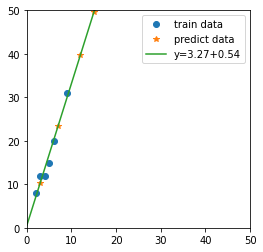

In [20]:
ntx = np.array(tx).reshape(-1)
plt.figure(figsize=(4,4))
plt.plot(xs,ys,'o',label='train data')
plt.plot(ntx,ty,'*',label='predict data')
plt.plot([0,50],[wp*0+bp,wp*50+bp],label=f'y={wp:.2f}+{bp:.2f}')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend()
plt.show()

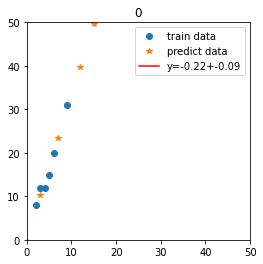

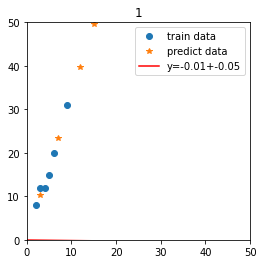

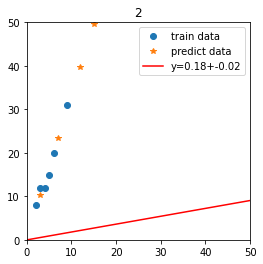

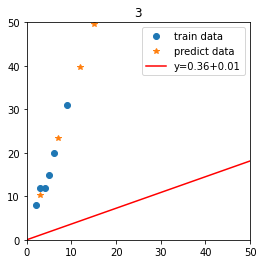

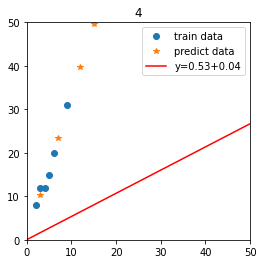

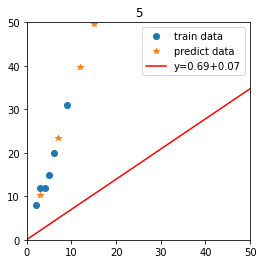

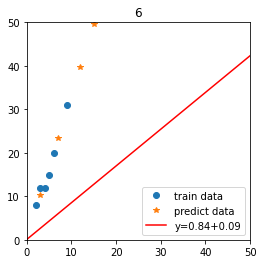

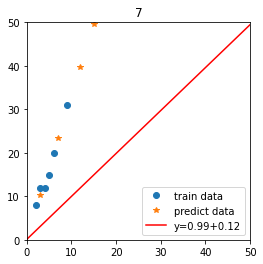

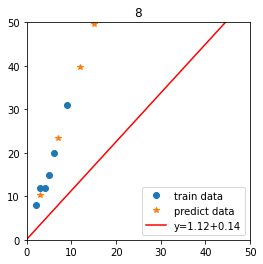

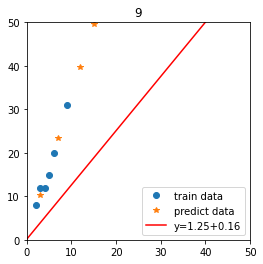

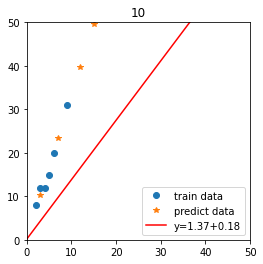

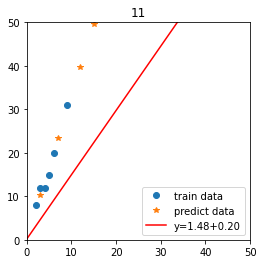

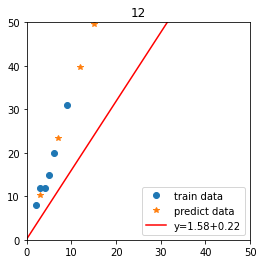

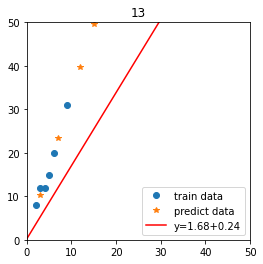

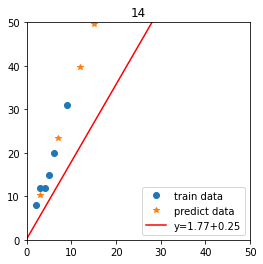

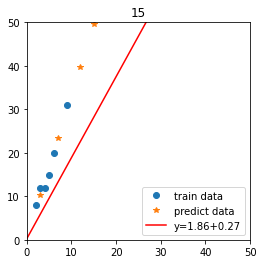

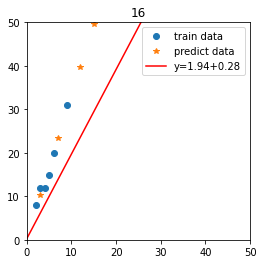

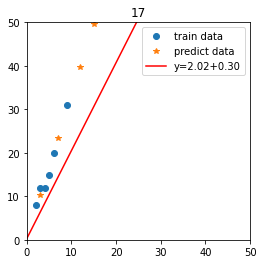

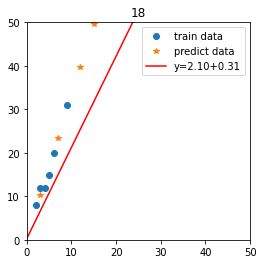

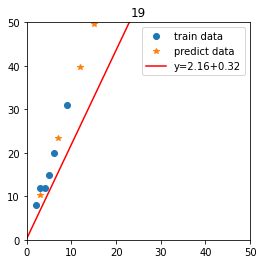

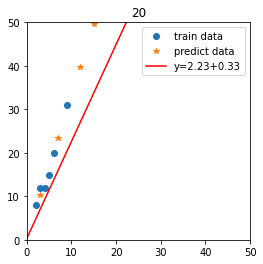

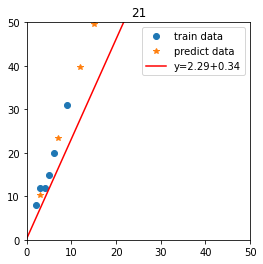

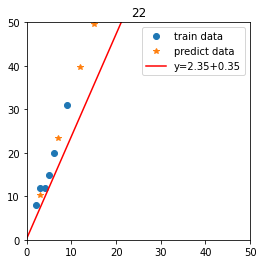

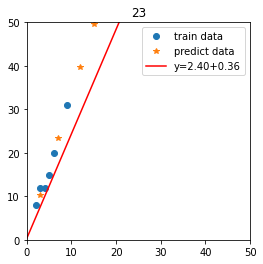

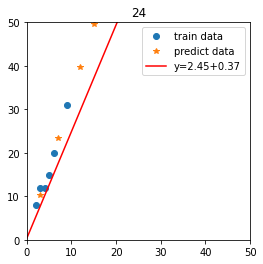

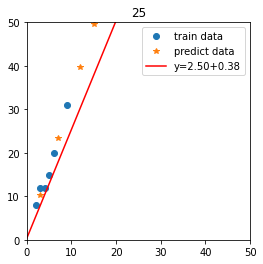

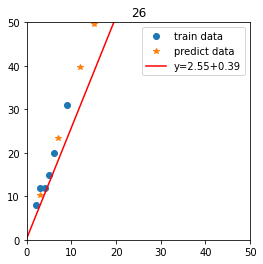

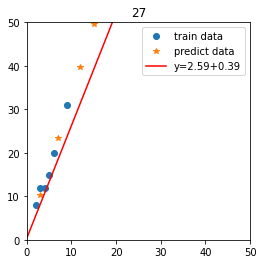

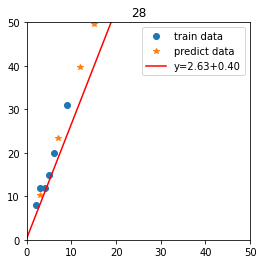

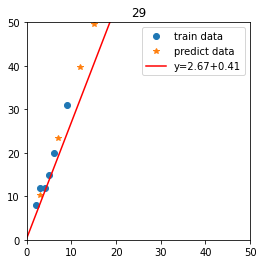

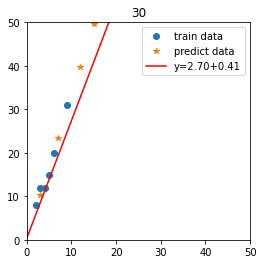

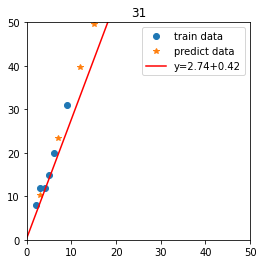

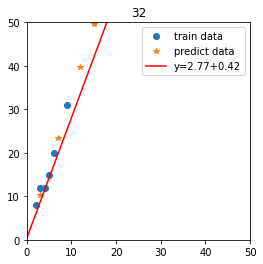

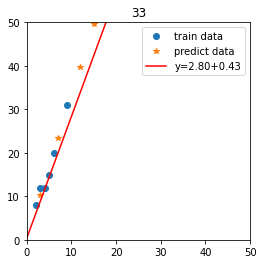

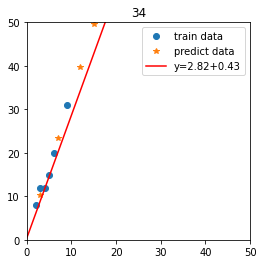

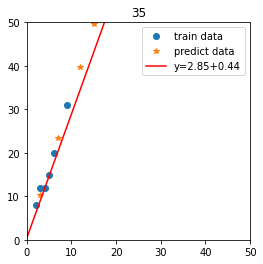

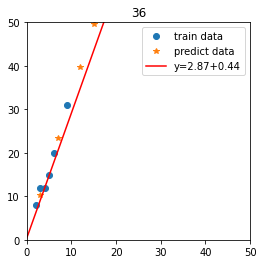

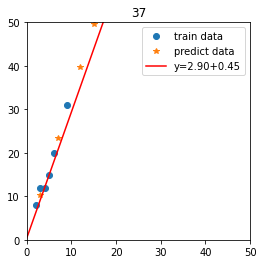

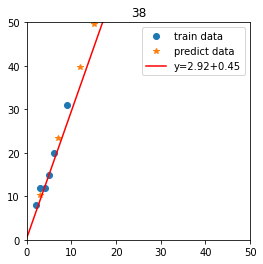

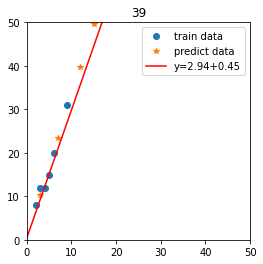

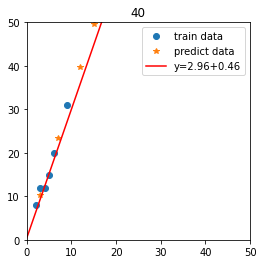

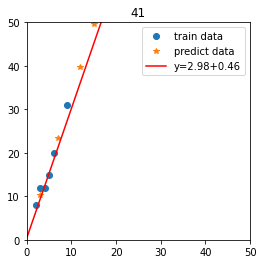

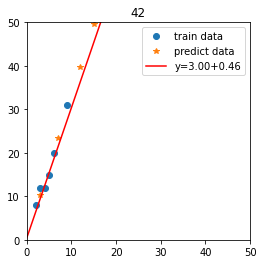

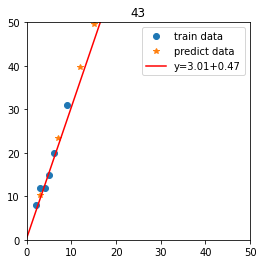

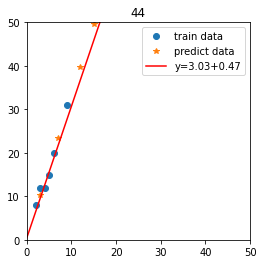

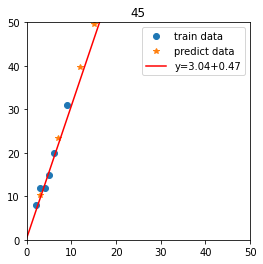

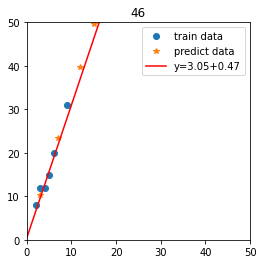

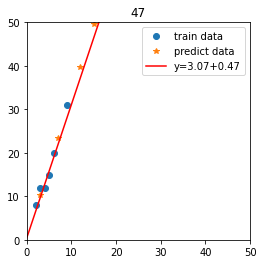

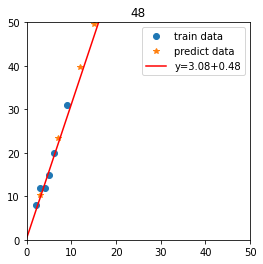

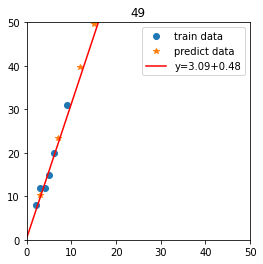

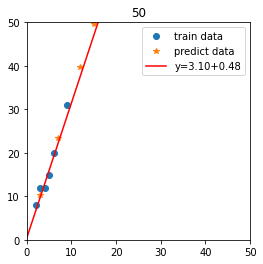

In [22]:
for i,(w,b) in enumerate(wbhl):
  plt.figure(figsize=(4,4))
  plt.plot(xs,ys,'o',label='train data')
  plt.plot(ntx,ty,'*',label='predict data')
  plt.plot([0,50],[w*0+b,w*50+b],'-r',label=f"y={w:.2f}+{b:.2f}")
  plt.xlim(0,50)
  plt.ylim(0,50)
  plt.legend()
  plt.title(str(i))
  plt.show()
  if i == 50:
    break

* 머신러닝의 선형 회귀 맛보기

사이킷런 사이트:http://scikit-learn.org/stable/

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()
xs = data['data']
ys = data['target']

In [28]:
columns = data['feature_names']
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
df = pd.DataFrame(xs)
df.columns = columns
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
s = pd.Series(ys)
s

In [30]:
xs = df[['AGE','CRIM','LSTAT','RM']]
xs.head()

,AGE,CRIM,LSTAT,RM
0,65.2,0.00632,4.98,6.575
1,78.9,0.02731,9.14,6.421
2,61.1,0.02729,4.03,7.185
3,45.8,0.03237,2.94,6.998
4,54.2,0.06905,5.33,7.147


In [31]:
s.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [32]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression() #모델 생성
model.fit(xs,s) # 학습해
print(f"{model.coef_},{model.intercept_}")

[ 0.01259342 -0.10638575 -0.61257821  5.11624558],-2.349101143530042


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(xs,s)

In [37]:
model = LinearRegression() #모델 생성
model.fit(x_train,y_train) # 학습해
print(f"{model.coef_},{model.intercept_}")

[ 0.01057324 -0.11457651 -0.56820079  5.29944538],-3.9915668480930897


In [ ]:
yps = model.predict(x_test)
for y,yp in zip(y_train,yps):
  print(f"{y:.2f},{yp:.2f}")

In [42]:
xs2.shape

(6,)

In [44]:
xs = [[2],[4],[9],[5],[3],[6]] # 특성이 하나로 구성된 독립변수 목록
ys = [8,12,31,15,12,20] # 종속변수 목록
model = LinearRegression()  # 모델 생성
model.fit(xs, ys) # 학습해
print(f"{model.coef_},{model.intercept_}")

[3.25405405],0.6054054054054046


In [47]:
!pip install ColabTurtlePlus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from ColabTurtlePlus import Turtle
Turtle.initializeTurtle()
Turtle.setup(width=200,height=200)
Turtle.shape('turtle')
Turtle.speed(1)
Turtle.forward(50)
Turtle.left(45)
Turtle.right(90)
Turtle.left(90)
Turtle.right(90)
Turtle.left(90)
Turtle.right(45)
Turtle.left(180)
Turtle.forward(110)
Turtle.left(180)
Turtle.forward(50)
Turtle.left(90)
Turtle.right(90)
Turtle.left(90)
Turtle.right(90)
Turtle.left(90)
Turtle.right(90)
Turtle.left(180)

In [59]:
print(Turtle.position())

(-10.0, 0.0)


In [67]:
from ColabTurtlePlus import Turtle
Turtle.initializeTurtle()
Turtle.setup(width=200,height=200)
Turtle.shape('turtle')
Turtle.goto(80,0)
Turtle.left(90)
Turtle.goto(0,80)
Turtle.left(90)
Turtle.goto(0,80)
Turtle.left(90)
Turtle.goto(0,0)
Turtle.sety(50)
Turtle.home()

In [69]:
Turtle.initializeTurtle()
Turtle.setup(width=200,height=200)
Turtle.hideturtle()
Turtle.shape('turtle')
Turtle.goto(80,0)
Turtle.showturtle()
Turtle.left(90)
Turtle.goto(0,80)
Turtle.left(90)
Turtle.goto(0,80)
Turtle.left(90)
Turtle.goto(0,0)
Turtle.sety(50)
Turtle.home()

In [ ]:
# 거북이 모양으로 변경
Turtle.shape("turtle")

angle = 89           # 거북이가 왼쪽으로 회전할 각도를 지정
Turtle.bgcolor("black")   # 배경색을 검은색으로 지정
Turtle.color("green")     # 펜 색을 녹색으로 지정
Turtle.speed(0)           # 거북이 속도를 가장 빠르게 지정
for x in range(200): # x 값을 0에서 199까지 바꾸면서 200번 실행
    Turtle.forward(x)     # x 만큼 앞으로 이동 (실행을 반복하면서 선이 
    길어짐)
    Turtle.left(angle)    # 거북이가 왼쪽으로 89도 회전

Turtle.hideturtle();      # 거북이를 화면에 보이지 않도록 숨긴다.

# Run -> Run Module (F5) 선택하여 실행

python-docx 메뉴얼 사이트:
https://python-docx.readthedocs.io/en/latest/

In [71]:
!pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.3 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=76879262e48dffaaed28860b694211e1bae07470adcc3215c3498d3bbe3169ef
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [72]:
from docx import Document

In [74]:
doc = Document() # 문서 개체 생성
doc.add_heading("문서 자동화 테스트 파일") # 헤더 추가
doc.add_paragraph('안녕하세요.') # 단락 추가
doc.save('demo.docx')

In [75]:
doc1 = Document() # 문서 개체 생성
doc1.add_heading('Doc1')
doc1.save('doc1.docx')
doc2 = Document('doc1.docx') # 존재하는 파일 명으로 문서 개체 생성
doc2.add_paragraph('새로운 단락을 추가') # 단락 추가
doc2.save('doc2.docx')

* Document 멤버

In [ ]:
# 제공 메서드
# add_heading(text=u'', level=1)
# add_page_break()
# add_paragraph(text=u'', style=None)
# add_picture(image_path_or_stream, width=None, height=None)
# add_section(start_type=2)
# add_table(rows, cols, style=None)
# save(path_or_stream)
# 제공 필드( 속성 )
# core_properties
# inline_shapes
# paragraphs
# part
# save(path_or_stream)
# sections
# settings
# styles
# tables

In [91]:
doc = Document()
doc.add_paragraph() # 빈 단락 추가
doc.add_paragraph('두 번째 단락') # 단락 추가
normal_style = doc.styles['Normal']
doc.add_paragraph('세 번째 단락', style=normal_style) 
doc.save('para1.docx')

In [80]:
from docx.enum.style import WD_STYLE_TYPE
doc = Document()
for style in doc.styles:
  if style.type == WD_STYLE_TYPE.PARAGRAPH:
    doc.add_paragraph(style.name,style=style)
doc.save('para2.docx')

In [82]:
from docx.enum.text import WD_ALIGN_PARAGRAPH
doc = Document()
para = doc.add_paragraph('단락1 입니다.')
para.add_run("현재 단락에 run을 추가합니다.")
para.alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph("단락2 입니다.")
doc.add_paragraph("단락3 입니다.")
doc.save("para3.docx")

In [92]:
doc = Document()
doc.add_heading("테이블사용") 
table2 = doc.add_table(2,5,gs) #2행 5열 테이블 생성
for r in range(len(table.rows)):
  row = table2.rows[r]
  for c in range(len(row.cells)):
    cell = row.cells[c]
    cell.text = f"{r},{c}"
doc.save('table2.docx')

In [93]:
doc = Document()
doc.add_heading("테이블사용") 
gs = Document().styles["Table Grid"]
table = doc.add_table(2,5,gs) #2행 5열 테이블 생성
for r in range(len(table.rows)):
  row = table.rows[r]
  for c in range(len(row.cells)):
    cell = row.cells[c]
    cell.text = f"{r},{c}"
doc.save('table1.docx')

In [ ]:
from docx import Document
from docx.enum.style import WD_STYLE_TYPE

styles = Document().styles
for style in styles:
  if style.type == WD_STYLE_TYPE.TABLE:
    print(style.name)
gs = Document().styles['Table Grid']
print(gs.name)

In [98]:
from docx.shared import Inches
doc = Document()
doc.add_heading("테이블사용") 
gs = Document().styles["Table Grid"]
table = doc.add_table(2,5,gs) #2행 5열 테이블 생성
for r in range(len(table.rows)):
  row = table.rows[r]
  for c in range(len(row.cells)):
    cell = row.cells[c]
    cell.text = f"{r},{c}"
cell = table.cell(0,0)
para = cell.add_paragraph()
run = para.add_run()
run.add_picture('/content/주차.png', width=Inches(1),height=Inches(1))

cell2 = table.cell(1,0)
cell2.width=Inches(4) # cell로 height는 변경할 수 없는 것 같은 느낌적인 느낌
table.rows[1].height=Inches(4)
doc.save('table3.docx')